<a href="https://colab.research.google.com/github/yhdonnie/azml/blob/circleci-project-setup/azml_143_DNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras DNN 으로 집값 예측하기

1. 패키지 수입 및 파라미터 설정


In [1]:
# 수입
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# parameter
MY_HIDDEN = 1000
MY_EPOCH = 500

# 한페이지에 다 나오게 
pd.set_option('display.max_columns', None)
import numpy as np
np.random.seed(123)

2. 데이터 처리

In [3]:
# 데이터 읽기
raw= pd.read_csv('/content/drive/MyDrive/data/housing.csv')

# 데이터 샘플 10개 출력
print(raw.head(10))

# 데이터 통계 출력
print(raw.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  
5   5.

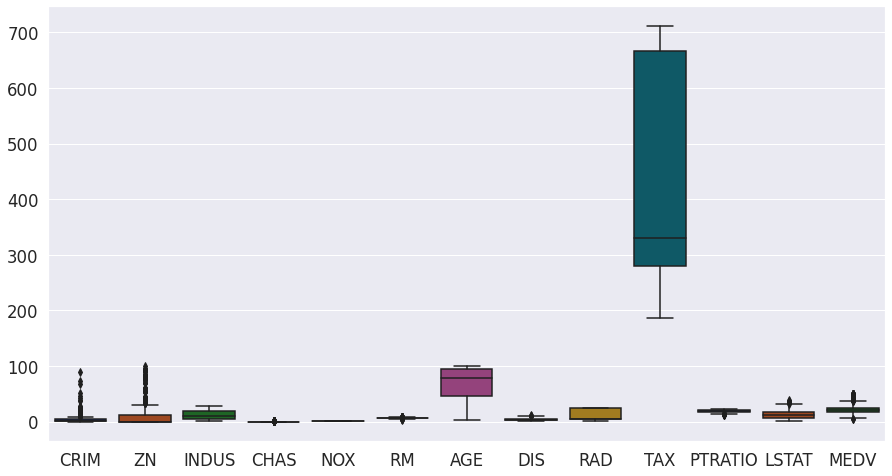

In [4]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(data=raw, palette='dark')

In [5]:
# z-점수 정규화
#scaler = StandardScaler()
#z_data = scaler.fit_transform(raw)

#min-max scaler
scaler = MinMaxScaler()
z_data = scaler.fit_transform(raw)

# 데이터 형식 출력
print(type(raw))
print(type(z_data))

# numpy 를 pandas로 재전환 (정규화하면 numpy가 되기 때문에)
heading = ['CRIM', 'ZN', 'INDUS', 'CHAR', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

z_data = pd.DataFrame(z_data, columns=heading)
print(type(z_data))

# z-점수 정규화된 데이터 샘플 출력
print(z_data.head(10))
print(z_data.describe())

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
       CRIM     ZN     INDUS  CHAR       NOX        RM       AGE       DIS  \
0  0.000000  0.180  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.000  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.000  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.000  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.000  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
5  0.000264  0.000  0.063050   0.0  0.150206  0.549722  0.574665  0.448545   
6  0.000921  0.125  0.271628   0.0  0.286008  0.469630  0.656025  0.402923   
7  0.001554  0.125  0.271628   0.0  0.286008  0.500287  0.959835  0.438387   
8  0.002303  0.125  0.271628   0.0  0.286008  0.396628  1.000000  0.450354   
9  0.001840  0.125  0.271628   0.0  0.286008  0.468097  0.854789  0.496731   

        RAD       TAX   PTRATIO     LSTAT

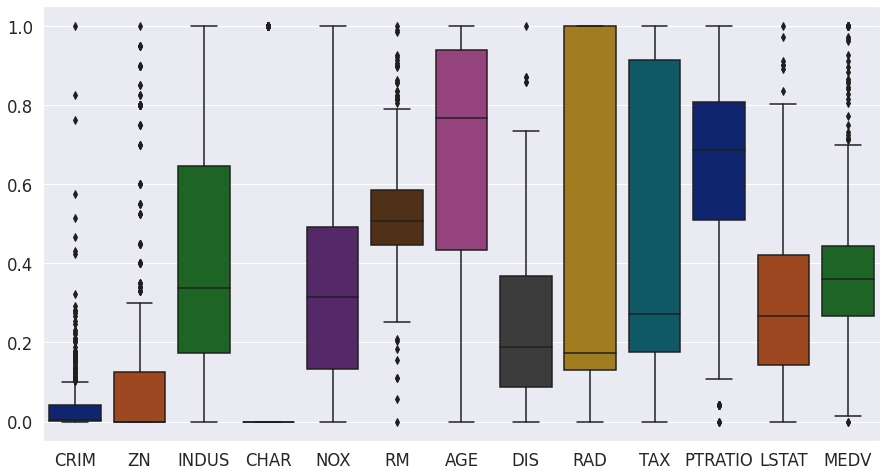

In [6]:
plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
sns.boxplot(data=z_data, palette='dark')

In [7]:
# 데이터 모양 출력
print('분리 전:', z_data.shape)

# 데이터를 입력과 출력으로 분리
X_data = z_data.drop('MEDV', axis=1)
Y_data = z_data['MEDV']

# 데이터 모양 출력
print('분리 후:')
print(X_data.shape)
print(Y_data.shape)

분리 전: (506, 13)
분리 후:
(506, 12)
(506,)


In [8]:
# 데이터 4분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                    Y_data,
                                                    train_size=0.7)
# 최종 데이터 모양 출력
print('학습용 입력 데이터 모양:', X_train.shape)
print('학습용 출력 데이터 모양:', Y_train.shape)
print('평가용 입력 데이터 모양:', X_test.shape)
print('평가용 출력 데이터 모양:', Y_test.shape)


학습용 입력 데이터 모양: (354, 12)
학습용 출력 데이터 모양: (354,)
평가용 입력 데이터 모양: (152, 12)
평가용 출력 데이터 모양: (152,)


3. 인공 신경망 구현

In [9]:
model = Sequential()

input = X_train.shape[1]

# 입력증과 은닉층 1 추가
model.add(Dense(units=MY_HIDDEN,
                input_dim=input,
                activation='relu'))

# 은닉층 2 추가
model.add(Dense(units=MY_HIDDEN,
                activation = 'relu'))


# 출력층 추가
model.add(Dense(units=1))

print('DNN 요약')
model.summary()

DNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              13000     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 1,015,001
Trainable params: 1,015,001
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 학습 환경 설정
model.compile(optimizer='adam',
              loss='mse')

print('학습시작')
begin = time()

model.fit(x=X_train,
          y=Y_train,
          epochs=MY_EPOCH,
          verbose=0)

end = time()
print('총 학습시간: {:.2f}초'.format(end - begin))

학습시작
총 학습시간: 46.55초


5. 인공 신경망 평가

In [11]:
# 신경망 평가
loss = model.evaluate(x=X_test,
                      y=Y_test,
                      verbose=0)

print('최종 손실값: {:.2f}'.format(loss))
print('최종 손실값: ', loss)

최종 손실값: 0.01
최종 손실값:  0.010828956961631775


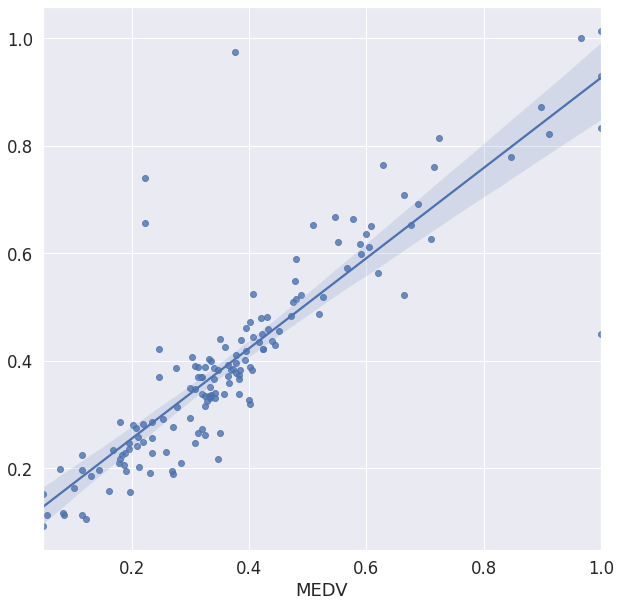

In [12]:
# DNN으로 예측
pred = model.predict(x=X_test)
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test, y=pred)

In [13]:
print(type(X_test))
print(X_test.iloc[2])
print(Y_test.iloc[2])
print(Y_test.shape)
print(pred[2])



<class 'pandas.core.frame.DataFrame'>
CRIM       0.000331
ZN         0.200000
INDUS      0.105205
CHAR       0.000000
NOX        0.119136
RM         0.816057
AGE        0.634398
DIS        0.324191
RAD        0.173913
TAX        0.055344
PTRATIO    0.244681
LSTAT      0.056015
Name: 280, dtype: float64
0.8977777777777778
(152,)
[0.87173086]
